In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(cross).csv")
data.head()

,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,...,mlp_prediction_non,mlp_prediction_phish,mlp_prediction_spam,mlp_prediction_malware,mlp_prediction_defacemen,lr_prediction_non,lr_prediction_phish,lr_prediction_spam,lr_prediction_malware,lr_prediction_defacemen
0,4,0.0,0.0,0.000000,0.0,1.000000,0.000449,0.066965,0.004490,0.001654,...,7.668730e-08,2.162310e-03,1.549511e-04,1.611232e-06,0.997681,0.004992,0.034186,0.057586,0.002846,0.900390
1,4,0.0,0.0,0.000000,0.0,1.000000,0.001289,0.031160,0.002688,0.029728,...,1.276945e-05,6.484004e-05,4.233496e-06,5.495467e-04,0.999369,0.003663,0.013835,0.004093,0.045520,0.932889
2,4,0.0,0.0,0.011236,0.0,0.988764,0.000724,0.004968,0.024952,0.027574,...,4.907073e-12,1.034916e-05,2.017918e-04,5.101557e-11,0.999788,0.007747,0.001978,0.014281,0.037836,0.938157
3,4,0.0,0.0,0.000000,0.0,1.000000,0.005968,0.057180,0.008171,0.055306,...,3.791420e-03,1.808396e-01,5.672841e-02,7.019997e-04,0.757939,0.141145,0.054924,0.018206,0.200887,0.584838
4,4,0.0,0.0,0.000000,0.0,1.000000,0.066109,0.000899,0.018838,0.036158,...,8.989922e-07,1.581241e-11,8.944011e-08,2.546812e-06,0.999996,0.018743,0.000147,0.014579,0.020418,0.946112


In [4]:
data.shape

(49610, 31)

In [5]:
data.columns

Index(['labels', 'dt_prediction_non', 'dt_prediction_phish',
       'dt_prediction_spam', 'dt_prediction_malware',
       'dt_prediction_defacemen', 'svc_prediction_non', 'svc_prediction_phish',
       'svc_prediction_spam', 'svc_prediction_malware',
       'svc_prediction_defacemen', 'knn_prediction_non',
       'knn_prediction_phish', 'knn_prediction_spam', 'knn_prediction_malware',
       'knn_prediction_defacemen', 'XGB_prediction_non',
       'XGB_prediction_phish', 'XGB_prediction_spam', 'XGB_prediction_malware',
       'XGB_prediction_defacemen', 'mlp_prediction_non',
       'mlp_prediction_phish', 'mlp_prediction_spam', 'mlp_prediction_malware',
       'mlp_prediction_defacemen', 'lr_prediction_non', 'lr_prediction_phish',
       'lr_prediction_spam', 'lr_prediction_malware',
       'lr_prediction_defacemen'],
      dtype='object')

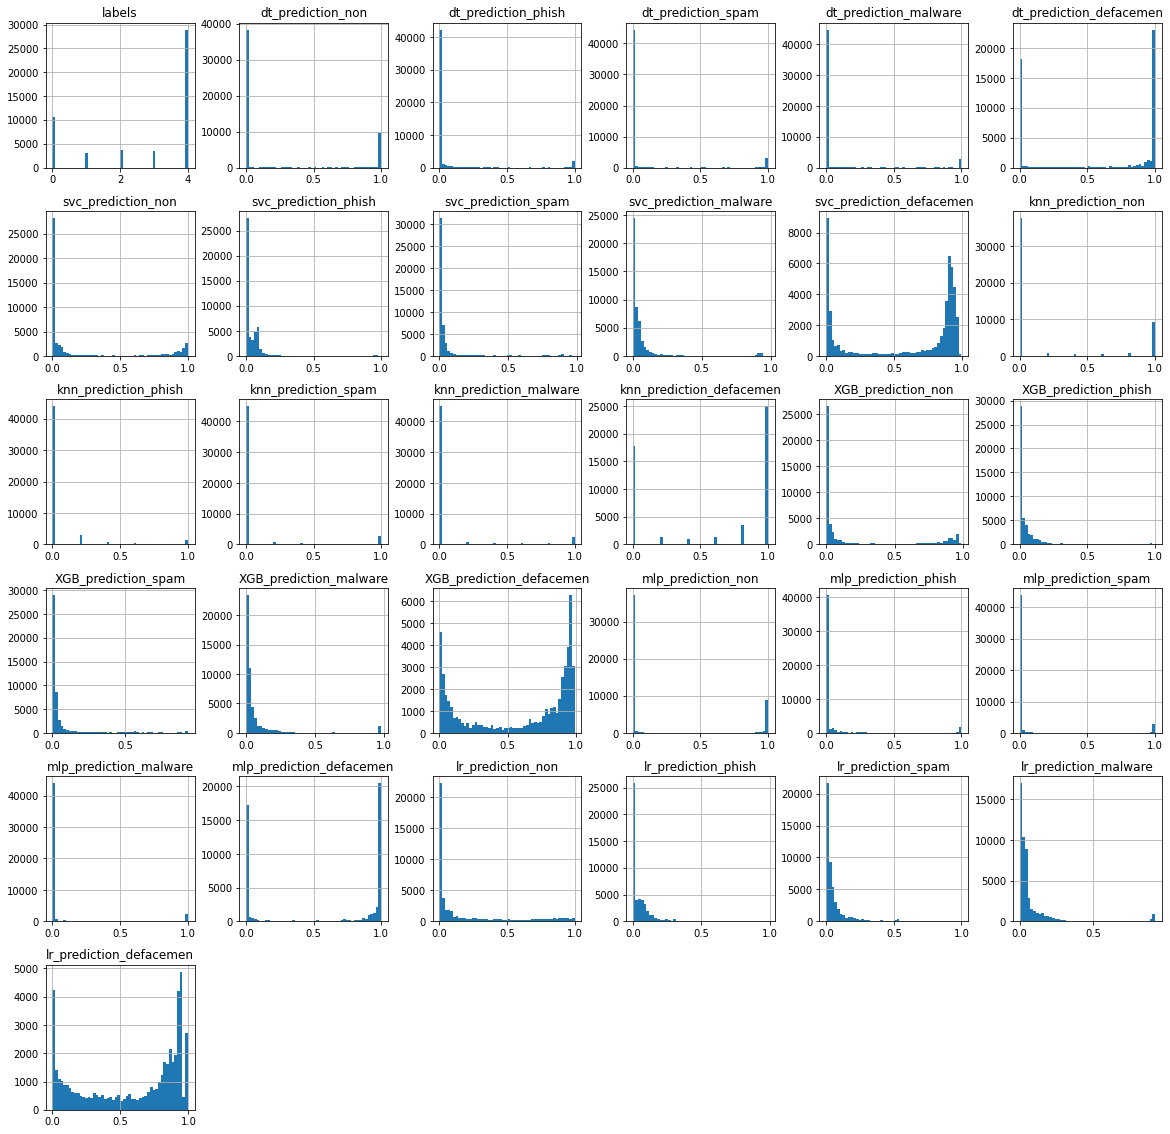

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting the data distribution
data.hist(bins = 50,figsize = (20,20))
plt.show()

In [7]:
data.describe()

,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,...,mlp_prediction_non,mlp_prediction_phish,mlp_prediction_spam,mlp_prediction_malware,mlp_prediction_defacemen,lr_prediction_non,lr_prediction_phish,lr_prediction_spam,lr_prediction_malware,lr_prediction_defacemen
count,49610.000000,49610.000000,49610.000000,49610.000000,49610.000000,49610.000000,4.961000e+04,49610.000000,4.961000e+04,4.961000e+04,...,4.961000e+04,4.961000e+04,4.961000e+04,4.961000e+04,4.961000e+04,4.961000e+04,4.961000e+04,4.961000e+04,4.961000e+04,4.961000e+04
mean,2.747450,0.213253,0.059601,0.073425,0.068693,0.585028,2.174769e-01,0.057013,7.204158e-02,6.778809e-02,...,2.176931e-01,6.239134e-02,7.301846e-02,6.958623e-02,5.773108e-01,2.139798e-01,5.875366e-02,7.001576e-02,7.213380e-02,5.851169e-01
std,1.661143,0.404060,0.212998,0.252538,0.242581,0.473658,3.634497e-01,0.135739,1.801278e-01,1.619011e-01,...,4.027319e-01,2.089038e-01,2.482129e-01,2.389715e-01,4.678690e-01,3.107577e-01,1.122663e-01,1.266597e-01,1.459181e-01,3.569777e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.648891e-08,0.000005,3.334867e-08,1.015920e-07,...,1.257516e-59,1.576330e-62,8.386753e-86,4.016415e-63,2.132029e-106,1.765463e-07,2.155011e-22,1.290425e-09,1.150440e-15,1.209747e-25
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250255e-03,0.001914,3.818295e-03,6.241006e-03,...,8.959011e-10,8.788750e-09,2.183157e-11,5.066001e-10,1.167865e-04,6.925649e-03,1.812278e-03,1.085415e-02,8.164847e-03,2.109058e-01
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.951456,9.481078e-03,0.010666,1.182367e-02,2.039421e-02,...,1.979774e-06,8.161451e-06,1.616363e-06,2.869460e-07,9.245923e-01,3.231455e-02,1.497631e-02,2.551237e-02,3.360763e-02,7.421321e-01
75%,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.995136e-01,0.072339,3.558186e-02,5.111923e-02,...,1.849064e-02,3.932650e-03,9.740255e-04,1.733337e-04,9.994295e-01,3.250653e-01,7.480614e-02,6.583954e-02,5.927556e-02,9.143489e-01
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.999272e-01,0.999610,9.841160e-01,9.805402e-01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.885239e-01,9.999998e-01,9.242987e-01,9.947893e-01


In [8]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(49610, 30) (49610,)


In [9]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [10]:
dy[5]

array([1., 0., 0., 0., 0.], dtype=float32)

In [11]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_aa(x_training, x_val, y_training, y_val, opt):

  model = Sequential()
  model.add(Dense(10, input_dim=30, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val))


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))


Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0544 - accuracy: 0.8831 - val_loss: 0.0173 - val_accuracy: 0.9613
Epoch 2/100
1396/1396 [==============================] - 4s 3ms/step - loss: 0.0139 - accuracy: 0.9619 - val_loss: 0.0121 - val_accuracy: 0.9641
Epoch 3/100
1396/1396 [==============================] - 4s 3ms/step - loss: 0.0121 - accuracy: 0.9625 - val_loss: 0.0117 - val_accuracy: 0.9643
Epoch 4/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0119 - accuracy: 0.9625 - val_loss: 0.0116 - val_accuracy: 0.9645
Epoch 5/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0119 - accuracy: 0.9622 - val_loss: 0.0116 - val_accuracy: 0.9641
Epoch 6/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.9623 - val_loss: 0.0116 - val_accuracy: 0.9649
Epoch 7/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.9629 - val_loss: 0.0116 - val_ac

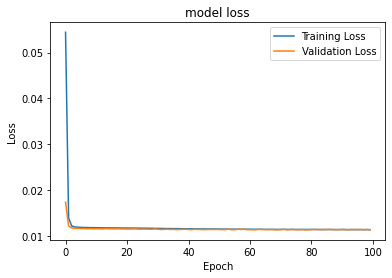

Validation Accuracy: 
Accuracy: 0.9637169925418262
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1051
           1       0.92      0.78      0.85       284
           2       0.96      0.94      0.95       383
           3       0.93      0.94      0.94       368
           4       0.97      0.98      0.97      2875

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.94      4961
weighted avg       0.96      0.96      0.96      4961

[[1031    2    1    8    9]
 [   1  222    5    4   52]
 [   2    1  360    3   17]
 [   4    1    1  346   16]
 [  20   15    8   10 2822]]
Epoch 1/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9454 - val_loss: 0.0131 - val_accuracy: 0.9609
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0123 - accuracy: 0.9622 - val_loss: 0.0125 - val_accuracy: 0.9619
Epoch 3/100
1396/1396 [======

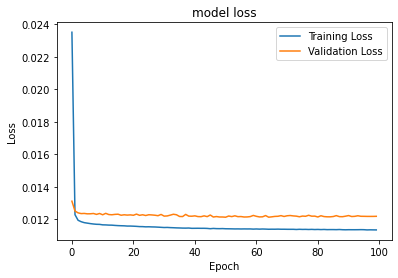

Validation Accuracy: 
Accuracy: 0.9610965531142914
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1055
           1       0.94      0.76      0.84       334
           2       0.97      0.94      0.95       381
           3       0.92      0.91      0.92       345
           4       0.96      0.99      0.97      2846

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.96      0.96      0.96      4961

[[1032    2    0   16    5]
 [   0  254    1    2   77]
 [   1    1  359    2   18]
 [   7    5    2  315   16]
 [  13    8   10    7 2808]]
Epoch 1/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0328 - accuracy: 0.9145 - val_loss: 0.0131 - val_accuracy: 0.9617
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0127 - accuracy: 0.9621 - val_loss: 0.0118 - val_accuracy: 0.9627
Epoch 3/100
1396/1396 [======

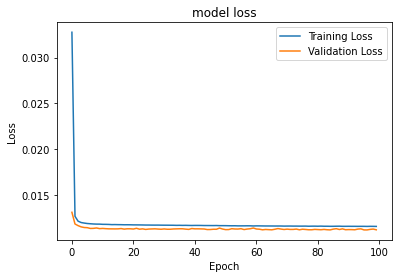

Validation Accuracy: 
Accuracy: 0.9631122757508567
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1095
           1       0.91      0.78      0.84       311
           2       0.99      0.94      0.96       352
           3       0.93      0.91      0.92       326
           4       0.97      0.99      0.98      2877

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.94      4961
weighted avg       0.96      0.96      0.96      4961

[[1069    3    0    9   14]
 [   4  243    3    5   56]
 [   1    1  332    1   17]
 [  11    5    0  298   12]
 [  16   14    2    9 2836]]
Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9308 - val_loss: 0.0138 - val_accuracy: 0.9571
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0122 - accuracy: 0.9627 - val_loss: 0.0131 - val_accuracy: 0.9585
Epoch 3/100
1396/1396 [======

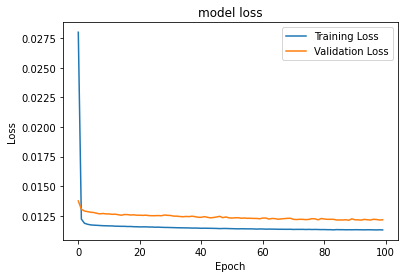

Validation Accuracy: 
Accuracy: 0.9598871195323524
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1016
           1       0.90      0.74      0.81       270
           2       0.96      0.94      0.95       367
           3       0.93      0.91      0.92       358
           4       0.97      0.98      0.97      2950

    accuracy                           0.96      4961
   macro avg       0.95      0.91      0.93      4961
weighted avg       0.96      0.96      0.96      4961

[[ 995    2    0    7   12]
 [   3  199    5    4   59]
 [   0    1  346    0   20]
 [  16    3    2  324   13]
 [  16   15    8   13 2898]]
Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9335 - val_loss: 0.0125 - val_accuracy: 0.9615
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0124 - accuracy: 0.9623 - val_loss: 0.0116 - val_accuracy: 0.9623
Epoch 3/100
1396/1396 [======

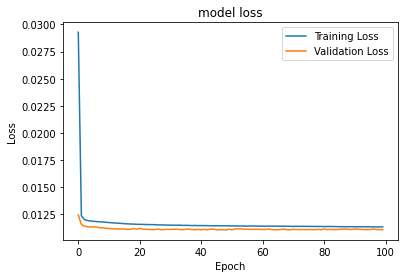

Validation Accuracy: 
Accuracy: 0.9637169925418262
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1068
           1       0.90      0.77      0.83       306
           2       0.97      0.93      0.95       388
           3       0.93      0.92      0.92       306
           4       0.97      0.99      0.98      2893

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.96      0.96      0.96      4961

[[1051    2    1    4   10]
 [   1  236    2    7   60]
 [   1    3  361    4   19]
 [   8    7    0  280   11]
 [  14   13    7    6 2853]]
Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.9380 - val_loss: 0.0129 - val_accuracy: 0.9623
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0122 - accuracy: 0.9625 - val_loss: 0.0124 - val_accuracy: 0.9615
Epoch 3/100
1396/1396 [======

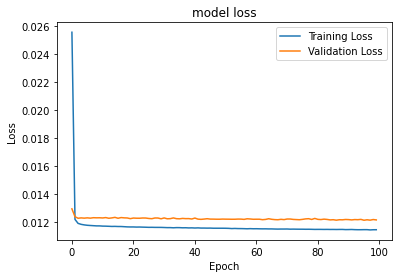

Validation Accuracy: 
Accuracy: 0.9614996976416045
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1079
           1       0.91      0.80      0.85       315
           2       0.97      0.89      0.93       356
           3       0.94      0.94      0.94       335
           4       0.96      0.99      0.97      2876

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.96      0.96      0.96      4961

[[1053    3    2   11   10]
 [   1  252    2    2   58]
 [   2    1  318    0   35]
 [   7    6    1  314    7]
 [  17   15    5    6 2833]]
Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9443 - val_loss: 0.0123 - val_accuracy: 0.9643
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0122 - accuracy: 0.9622 - val_loss: 0.0117 - val_accuracy: 0.9631
Epoch 3/100
1396/1396 [======

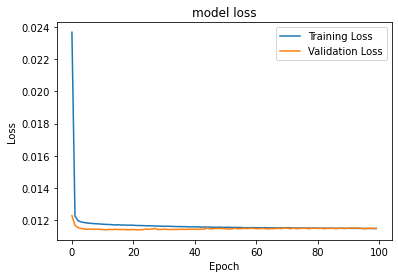

Validation Accuracy: 
Accuracy: 0.9629107034872002
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1055
           1       0.91      0.79      0.85       325
           2       0.97      0.91      0.94       362
           3       0.93      0.94      0.94       325
           4       0.97      0.98      0.97      2894

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.94      4961
weighted avg       0.96      0.96      0.96      4961

[[1035    3    1    7    9]
 [   1  258    1    4   61]
 [   1    5  331    3   22]
 [   6    3    0  306   10]
 [  16   14    8    9 2847]]
Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9296 - val_loss: 0.0133 - val_accuracy: 0.9621
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0123 - accuracy: 0.9622 - val_loss: 0.0126 - val_accuracy: 0.9623
Epoch 3/100
1396/1396 [======

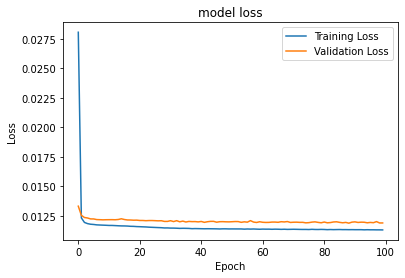

Validation Accuracy: 
Accuracy: 0.9635154202781697
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1071
           1       0.92      0.78      0.84       308
           2       0.95      0.93      0.94       311
           3       0.94      0.92      0.93       349
           4       0.97      0.98      0.97      2922

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.96      0.96      0.96      4961

[[1053    2    0    8    8]
 [   1  240    4    6   57]
 [   0    1  289    0   21]
 [   6    0    3  322   18]
 [  14   18    9    5 2876]]
Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9524 - val_loss: 0.0122 - val_accuracy: 0.9625
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0123 - accuracy: 0.9622 - val_loss: 0.0116 - val_accuracy: 0.9651
Epoch 3/100
1396/1396 [======

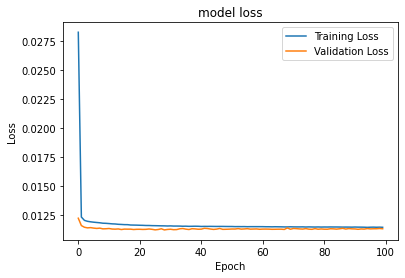

Validation Accuracy: 
Accuracy: 0.9643217093327958
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1046
           1       0.93      0.77      0.84       317
           2       0.96      0.95      0.95       348
           3       0.94      0.94      0.94       351
           4       0.97      0.99      0.98      2899

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.94      4961
weighted avg       0.96      0.96      0.96      4961

[[1021    2    2   12    9]
 [   2  243    4    3   65]
 [   0    0  331    2   15]
 [   2    2    4  331   12]
 [  17   13    5    6 2858]]
Epoch 1/100
1396/1396 [==============================] - 4s 2ms/step - loss: 0.0329 - accuracy: 0.9172 - val_loss: 0.0135 - val_accuracy: 0.9613
Epoch 2/100
1396/1396 [==============================] - 3s 2ms/step - loss: 0.0125 - accuracy: 0.9618 - val_loss: 0.0123 - val_accuracy: 0.9617
Epoch 3/100
1396/1396 [======

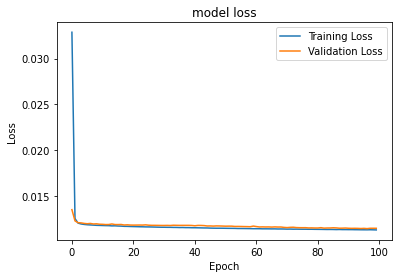

Validation Accuracy: 
Accuracy: 0.9614996976416045
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1044
           1       0.93      0.77      0.84       299
           2       0.97      0.94      0.96       357
           3       0.93      0.92      0.93       339
           4       0.96      0.98      0.97      2922

    accuracy                           0.96      4961
   macro avg       0.95      0.92      0.93      4961
weighted avg       0.96      0.96      0.96      4961

[[1019    1    1    7   16]
 [   3  230    2    5   59]
 [   0    1  337    1   18]
 [   4    6    0  312   17]
 [  25    9    6   10 2872]]


In [12]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1)

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense



model = Sequential()
model.add(Dense(5, input_dim=30, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 5)                 155       
                                                                 
 dense_27 (Dense)            (None, 5)                 30        
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
  # Predicting the Val set results
  # y_pred = model.predict(x_val)
  # Y_pred_classes = np.argmax(y_pred,axis = 1) 
  # Y_true = np.argmax(y_val,axis = 1) 


  # # Model Accuracy, how often is the classifier correct?
  # print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  # #target_names = ['True', 'False']
  # print(classification_report(Y_true, Y_pred_classes))


  # print(confusion_matrix(Y_true, Y_pred_classes))


In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, f1_score, make_scorer, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from keras.wrappers.scikit_learn import KerasClassifier

def buildModel():
  model = Sequential()
  model.add(Dense(5, input_dim=30, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
  return model


def f1_scorer(Y,Y_pred, **kwargs):
  return f1_score(Y,Y_pred,**kwargs)
def accuracy_scorer(Y,Y_pred, **kwargs):
  return accuracy_score(Y,Y_pred,**kwargs)
def precision_scorer(Y,Y_pred, **kwargs):
  return precision_score(Y,Y_pred,**kwargs)
def recall_scorer(Y,Y_pred, **kwargs):
  return recall_score(Y,Y_pred,**kwargs)


df = pd.read_csv('/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result.csv')#.sample(frac=0.1)
X = df.drop(['labels'], axis=1).reset_index(drop=True)
Y = df['labels'].reset_index(drop=True)
# Y = np_utils.to_categorical(Y)
estimator = KerasClassifier(build_fn=buildModel, epochs=20, batch_size=5, verbose=2)
kfold = KFold(n_splits=10, shuffle=True)
scoring = {
  "accuracy": make_scorer(accuracy_scorer),
  "f1": make_scorer(f1_scorer, average='weighted'),
  "precision": make_scorer(precision_scorer, average='weighted'),
  "recall": make_scorer(recall_scorer, average='weighted'),
}
results = cross_validate(estimator, X, Y, cv=kfold, scoring=scoring, n_jobs=4)
print(results)

print("Accuracy: %.4f%% " % (results['test_accuracy'].mean()*100))
print("Precision: %.4f%% " % (results['test_precision'].mean()*100))
print("Recall: %.4f%% " % (results['test_recall'].mean()*100))
print("F1: %.4f%% " % (results['test_f1'].mean()*100))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'fit_time': array([3023.73992729, 3023.72518325, 3023.82817864, 3023.88081431,
       3024.20806456, 3024.52521348, 3024.60681605, 3025.81211376,
       1342.39599681, 1343.2719624 ]), 'score_time': array([2.9155345 , 2.91833472, 2.28151989, 2.19263291, 0.80552697,
       1.64329052, 1.65977693, 1.84930158, 0.78489995, 0.6377902 ]), 'test_accuracy': array([0.93844107, 0.93535708, 0.93952954, 0.93789684, 0.93916672,
       0.93723166, 0.94164248, 0.93686502, 0.93746976, 0.93759071]), 'test_f1': array([0.93744506, 0.93399426, 0.9384102 , 0.93675451, 0.93782108,
       0.9358825 , 0.94075628, 0.93543984, 0.93628011, 0.93643541]), 'test_precision': array([0.93788935, 0.93459065, 0.93885129, 0.93704647, 0.93875591,
       0.93688022, 0.94144252, 0.93626244, 0.9366679 , 0.93703848]), 'test_recall': array([0.93844107, 0.93535708, 0.93952954, 0.93789684, 0.93916672,
       0.93723166, 0.94164248, 0.93686502, 0.93746976, 0.93759071])}
Accuracy: 93.8119% 
Precision: 93.7543% 
Recall: 93.8119% 
